# Flatness v.s. Generalization - Part 1

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.nn.utils import parameters_to_vector, vector_to_parameters

In [2]:
torch.manual_seed(1)

In [3]:
alpha = torch.linspace(-2.0, 2.0, 30, dtype=torch.float)

## Datasets

### MNIST

In [4]:
# The training data
mnist_training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# The testing data
mnist_test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [5]:
def get_train_dataloader(batch_size):
    mnist_train_dataloader = DataLoader(
        mnist_training_data, batch_size=batch_size, shuffle=True
    )
    return mnist_train_dataloader


def get_test_dataloader(batch_size):
    mnist_test_dataloader = DataLoader(mnist_test_data, batch_size=batch_size)
    return mnist_test_dataloader

## Training Function

In [6]:
def train(args, model, train_loader, loss_func, optimizer, epoch):
    model.train()
    loss = None
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(output.data, 1)
        correct += (predicted == target).sum().item()

        if batch_idx % args["log_interval"] == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch,
                    batch_idx * len(data),
                    len(train_loader.dataset),
                    100.0 * batch_idx / len(train_loader),
                    loss.item(),
                )
            )
    return loss.item(), correct / len(train_loader.dataset)

## Testing Function

In [7]:
def test(model, loss_func, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_func(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print(
        "\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(
            test_loss,
            correct,
            len(test_loader.dataset),
            100.0 * correct / len(test_loader.dataset),
        )
    )

    return test_loss, correct / len(test_loader.dataset)

## Model

In [8]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 4000)
        self.fc2 = nn.Linear(4000, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## batch size = 64 vs batch size = 1024

In [17]:
training_loss_per_model = []

In [18]:
args = {"log_interval": 200, "lr": 1e-3, "epochs": 5, "batch_size": 64}

In [19]:
train_dataloader = get_train_dataloader(args["batch_size"])

In [20]:
model = Model()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args["lr"])

In [21]:
training_loss = []
for epoch in range(1, args["epochs"] + 1):
    loss, acc = train(args, model, train_dataloader, loss_func, optimizer, epoch)
    training_loss.append(loss)
training_loss_per_model.append(training_loss)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.290499
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.180929
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.088882
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.191145
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.054830
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.048841
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.025537
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.006708
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.067316
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.036135
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.021618
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.009796
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.001889
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.014052
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.006659
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.030149
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.016763
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.024371
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.037938
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.028379
Train Epoch: 5 [0/60

In [22]:
batch1_param = parameters_to_vector(model.parameters())

In [23]:
args = {"log_interval": 200, "lr": 1e-3, "epochs": 5, "batch_size": 1024}

In [24]:
train_dataloader = get_train_dataloader(args["batch_size"])

In [25]:
model = Model()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args["lr"])

In [26]:
training_loss = []
for epoch in range(1, args["epochs"] + 1):
    loss, acc = train(args, model, train_dataloader, loss_func, optimizer, epoch)
    training_loss.append(loss)
training_loss_per_model.append(training_loss)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.308649
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.203929
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.121837
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.077255
Train Epoch: 5 [0/60000 (0%)]	Loss: 0.055353


In [27]:
batch2_param = parameters_to_vector(model.parameters())

Text(0, 0.5, 'loss')

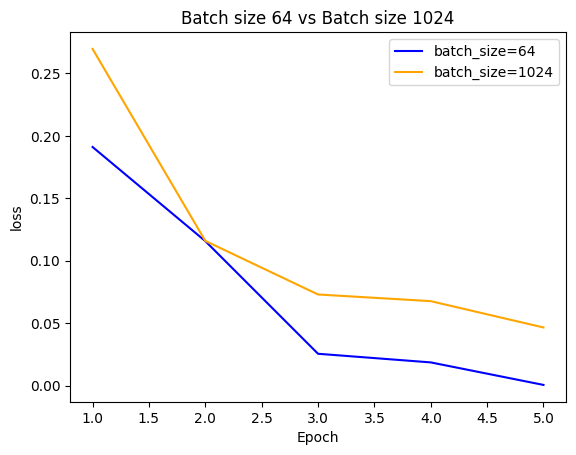

In [28]:
plt.plot(
    np.arange(1, args["epochs"] + 1),
    training_loss_per_model[0],
    label="batch_size=64",
    color="blue",
)
plt.plot(
    np.arange(1, args["epochs"] + 1),
    training_loss_per_model[1],
    label="batch_size=1024",
    color="orange",
)
plt.title("Batch size 64 vs Batch size 1024")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("loss")

---

In [47]:
training_loss_per_model = []
training_acc_per_model = []
testing_loss_per_model = []
testing_acc_per_model = []

In [46]:
args = {"log_interval": 200, "lr": 1e-5, "epochs": 1, "batch_size": 500}

In [48]:
for idx in range(len(alpha)):
    theta = (1 - alpha[idx]) * batch1_param + alpha[idx] * batch2_param
    train_dataloader = get_train_dataloader(args["batch_size"])
    test_dataloader = get_test_dataloader(args["batch_size"])
    model = Model()
    vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=args["lr"])
    training_loss = []
    training_acc = []
    testing_loss = []
    testing_acc = []
    for epoch in range(1, args["epochs"] + 1):
        loss, acc = train(args, model, train_dataloader, loss_func, optimizer, epoch)
        training_loss.append(loss)
        training_acc.append(acc)
        loss, acc = test(model, loss_func, test_dataloader)
        testing_loss.append(loss)
        testing_acc.append(acc)
    training_loss_per_model.append(training_loss)
    training_acc_per_model.append(training_acc)
    testing_loss_per_model.append(testing_loss)
    testing_acc_per_model.append(testing_acc)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.073478

Test set: Average loss: 0.0012, Accuracy: 9764/10000 (98%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.074442

Test set: Average loss: 0.0011, Accuracy: 9769/10000 (98%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.079278

Test set: Average loss: 0.0010, Accuracy: 9776/10000 (98%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.177992

Test set: Average loss: 0.0008, Accuracy: 9779/10000 (98%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.066055

Test set: Average loss: 0.0007, Accuracy: 9783/10000 (98%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.014953

Test set: Average loss: 0.0007, Accuracy: 9786/10000 (98%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.017501

Test set: Average loss: 0.0006, Accuracy: 9788/10000 (98%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.021056

Test set: Average loss: 0.0005, Accuracy: 9790/10000 (98%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.054275

Test set: Average loss: 0.0004, Accuracy: 9797/10000 (98%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.011541



### Result

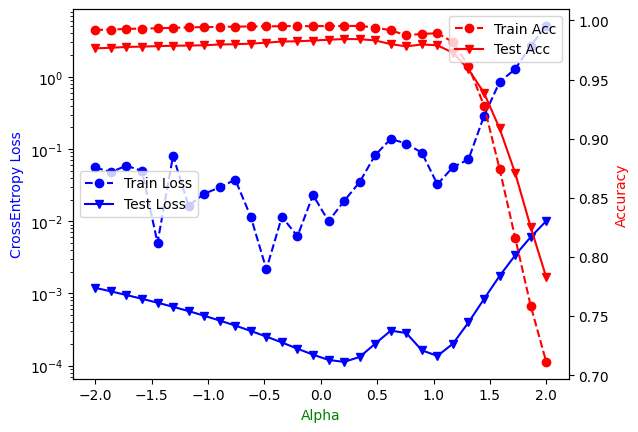

In [49]:
fig, ax = plt.subplots()

ax.plot(alpha, training_loss_per_model, color="Blue", linestyle="dashed", marker="o")
ax.plot(alpha, testing_loss_per_model, color="Blue", marker="v")
ax.set_yscale("log")
ax.legend(["Train Loss", "Test Loss"], loc="center left")
ax.set_xlabel("Alpha", color="Green")
ax.set_ylabel("CrossEntropy Loss", color="blue")

ax2 = ax.twinx()
ax2.plot(alpha, training_acc_per_model, color="red", linestyle="dashed", marker="o")
ax2.plot(alpha, testing_acc_per_model, color="red", marker="v")
ax2.set_xlabel("Alpha", color="Green")
ax2.set_ylabel("Accuracy", color="red")
ax2.legend(["Train Acc", "Test Acc"], loc="upper right")

plt.show()

## learning rate = 1e-2 vs learning rate = 1e-3

In [50]:
training_loss_per_model = []

In [51]:
args = {"log_interval": 200, "lr": 1e-2, "epochs": 5, "batch_size": 64}

In [52]:
train_dataloader = get_train_dataloader(args["batch_size"])

In [53]:
model = Model()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args["lr"])

In [54]:
training_loss = []
for epoch in range(1, args["epochs"] + 1):
    loss, acc = train(args, model, train_dataloader, loss_func, optimizer, epoch)
    training_loss.append(loss)
training_loss_per_model.append(training_loss)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.312849
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.098811
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.393238
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.333877
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.180621
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.147361
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.097024
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.123681
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.279975
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.020164
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.118489
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.147699
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.195292
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.026442
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.159655
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.015615
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.109943
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.100256
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.113091
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.029181
Train Epoch: 5 [0/60

In [55]:
batch1_param = parameters_to_vector(model.parameters())

In [56]:
args = {"log_interval": 200, "lr": 1e-3, "epochs": 5, "batch_size": 64}

In [57]:
train_dataloader = get_train_dataloader(args["batch_size"])

In [58]:
model = Model()
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=args["lr"])

In [59]:
training_loss = []
for epoch in range(1, args["epochs"] + 1):
    loss, acc = train(args, model, train_dataloader, loss_func, optimizer, epoch)
    training_loss.append(loss)
training_loss_per_model.append(training_loss)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.320627
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.085487
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.049657
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.104000
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.136929
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.061903
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.056539
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.149629
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.019528
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.114061
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.033596
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.072120
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.060043
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.006734
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.139380
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.015447
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.023953
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.055472
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.057912
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.062973
Train Epoch: 5 [0/60

In [60]:
batch2_param = parameters_to_vector(model.parameters())

Text(0, 0.5, 'loss')

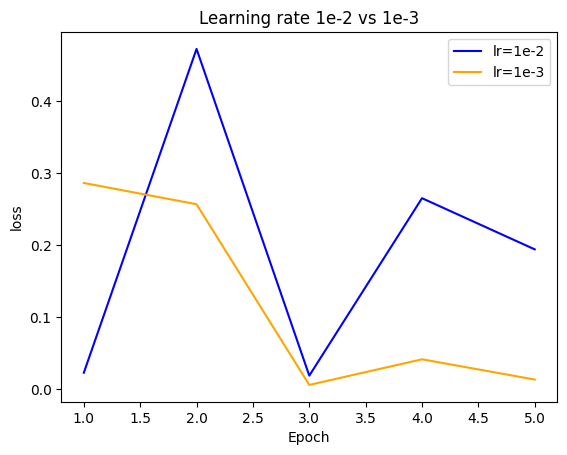

In [61]:
plt.plot(
    np.arange(1, args["epochs"] + 1),
    training_loss_per_model[0],
    label="lr=1e-2",
    color="blue",
)
plt.plot(
    np.arange(1, args["epochs"] + 1),
    training_loss_per_model[1],
    label="lr=1e-3",
    color="orange",
)
plt.title("Learning rate 1e-2 vs 1e-3")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("loss")

---

In [62]:
training_loss_per_model = []
training_acc_per_model = []
testing_loss_per_model = []
testing_acc_per_model = []

In [63]:
args = {"log_interval": 200, "lr": 1e-5, "epochs": 1, "batch_size": 500}

In [64]:
for idx in range(len(alpha)):
    theta = (1 - alpha[idx]) * batch1_param + alpha[idx] * batch2_param
    train_dataloader = get_train_dataloader(args["batch_size"])
    test_dataloader = get_test_dataloader(args["batch_size"])
    model = Model()
    vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=args["lr"])
    training_loss = []
    training_acc = []
    testing_loss = []
    testing_acc = []
    for epoch in range(1, args["epochs"] + 1):
        loss, acc = train(args, model, train_dataloader, loss_func, optimizer, epoch)
        training_loss.append(loss)
        training_acc.append(acc)
        loss, acc = test(model, loss_func, test_dataloader)
        testing_loss.append(loss)
        testing_acc.append(acc)
    training_loss_per_model.append(training_loss)
    training_acc_per_model.append(training_acc)
    testing_loss_per_model.append(testing_loss)
    testing_acc_per_model.append(testing_acc)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.608513

Test set: Average loss: 0.0032, Accuracy: 9675/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.708408

Test set: Average loss: 0.0029, Accuracy: 9675/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.754099

Test set: Average loss: 0.0026, Accuracy: 9677/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.879532

Test set: Average loss: 0.0023, Accuracy: 9678/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.479802

Test set: Average loss: 0.0021, Accuracy: 9681/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.256846

Test set: Average loss: 0.0018, Accuracy: 9686/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.474560

Test set: Average loss: 0.0016, Accuracy: 9686/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.197288

Test set: Average loss: 0.0014, Accuracy: 9685/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.151719

Test set: Average loss: 0.0012, Accuracy: 9685/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.159993



### Result

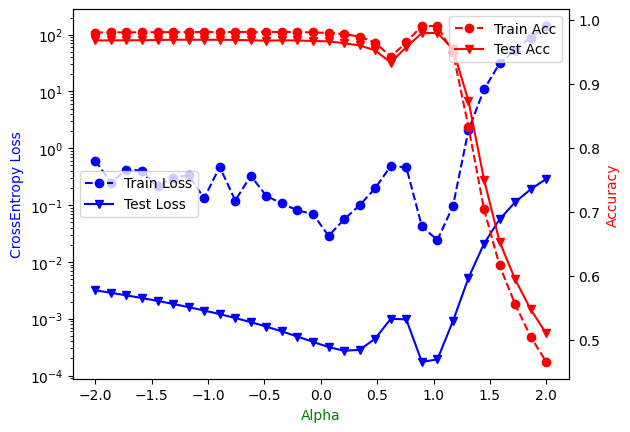

In [65]:
fig, ax = plt.subplots()

ax.plot(alpha, training_loss_per_model, color="Blue", linestyle="dashed", marker="o")
ax.plot(alpha, testing_loss_per_model, color="Blue", marker="v")
ax.set_yscale("log")
ax.legend(["Train Loss", "Test Loss"], loc="center left")
ax.set_xlabel("Alpha", color="Green")
ax.set_ylabel("CrossEntropy Loss", color="blue")

ax2 = ax.twinx()
ax2.plot(alpha, training_acc_per_model, color="red", linestyle="dashed", marker="o")
ax2.plot(alpha, testing_acc_per_model, color="red", marker="v")
ax2.set_xlabel("Alpha", color="Green")
ax2.set_ylabel("Accuracy", color="red")
ax2.legend(["Train Acc", "Test Acc"], loc="upper right")

plt.show()